## 1. Load the Dataset

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Obesity_dataset.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Feature's description:

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

**Gender** - Female / Male

**Age** - Numeric value

**Height** - Numeric value in meters

**Weight** - Numeric value in kilograms

**family_history_with_overweight** - Has a family member suffered or suffers from overweight? Yes / No

**FAVC** - Do you eat high caloric food frequently?  Yes / No

**FCVC** - Do you usually eat vegetables in your meals? Never / Sometimes / Always

**NCP** - How many main meals do you have daily?

**CAEC** - Do you eat any food between meals? No / Sometimes / Frequently / Always

**SMOKE** - Do you smoke? Yes / No

**CH2O** - How much water do you drink daily? Less than a 1L / Between 1 and 2L / More than 2L

**SCC** - Do you monitor the calories you eat daily? Yes / No

**FAF** - 	How often do you have physical activity? I do not have / 1 or 2 days / 2 or 4 days / 4 or 5 days

**TUE** - How much time do you use technological devices such as cell phone, videogames, television, computer and others? 0-2 hours / 3-5 hours / More than 5 hours

**CALC** - How often do you drink alcohol? I do not drink / Sometimes / Frequently / Always

**MTRANS** - Which transportation do you usually use? Automobile / Motorbike / Bike / Public Transportation / Walking

**NObeyesdad** - Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III)

## 2. Define the objective
### What do we want to predict?
We want to predict the patient's level of obesity

### Is it a classification or regression problem?
It is a classification problem

### Important assumption

As already mentioned, our aim is to predict the level of obesity of future patients. We use the Body Mass Index (BMI) to calculate obesity. BMI is calculated as weight in kilograms divided by height in metres squared. 

We will therefore delete these two features from our data set and create a prediction model based on the other features. It makes no sense to create a model that takes weight and height into account as features, because in the future we will not have this information. And if we do, we won't need a machine learning model to determine a person's level of obesity

So we will try to create a prediction model that predicts how likely a person is to be obese based on their current age, habits, lifestyle, family history and so on.



In [149]:
df = df.drop(['Weight', 'Height'], axis = 1)
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 3. Exploratory data analysis (EDA)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   FAVC                            2111 non-null   object 
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [152]:
df.describe()

,Age,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [153]:
df.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [154]:
df.duplicated().sum()

29

In [155]:
df = df.drop_duplicates()
df.duplicated().sum()

0

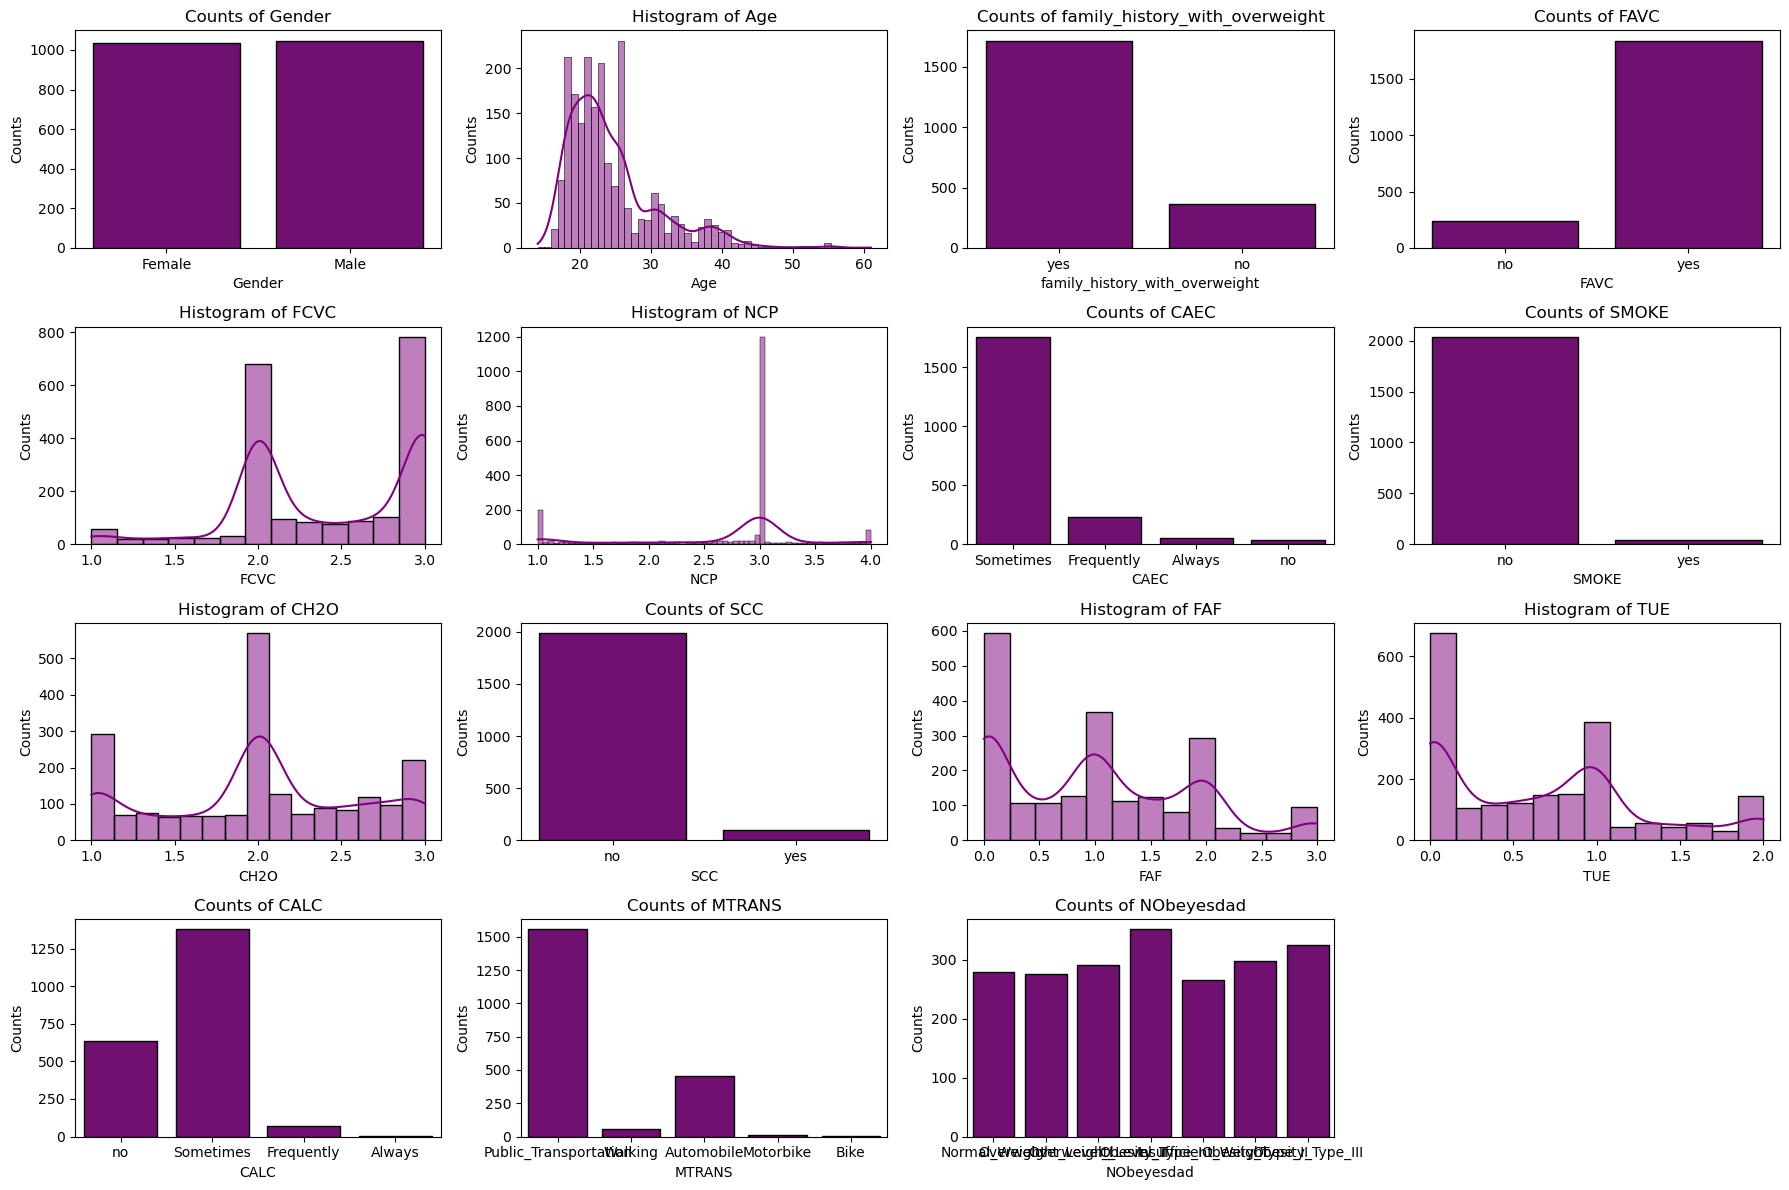

In [156]:
columns = df.columns
continuous_features = df.select_dtypes(include = 'float').columns

nrows = np.ceil(len(columns)/4).astype('int')

plt.figure(figsize=(18,12))

for i, c in enumerate(columns):

    plt.subplot(nrows, 4, i+1)
    
    if c in continuous_features:
        sns.histplot(data = df, x = c, kde = True, color = 'purple', edgecolor = 'black')
        plt.title(f"Histogram of {c}")
        plt.xlabel(c)
        plt.ylabel('Counts')
        
    else:
        sns.countplot(data = df, x = c, color = 'purple', edgecolor = 'black')
        plt.title(f"Counts of {c}")
        plt.xlabel(c)
        plt.ylabel('Counts')

plt.tight_layout()
plt.show()

## 4. Feature Engineering

**Transforming and encoding variables**

In [158]:
df_transformed = df.copy()

# Round columns
def rounded_column(df, column_name):
    df[column_name] = df[column_name].round(decimals = 0).astype(int)
    return df

round_columns = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in round_columns:
    df_transformed = rounded_column(df_transformed, col)

# Binary mappings
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for bc in binary_columns:
    df_transformed[bc] = df_transformed[bc].map({'no': 0, 'yes': 1}).astype('int')

df_transformed['Gender'] = df_transformed['Gender'].map({'Female': 0, 'Male': 1}).astype('int')

# Ordinal mappings
df_transformed['CAEC'] = df_transformed['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype('int')
df_transformed['CALC'] = df_transformed['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype('int')

# We consider walking and cycling to be beneficial against obesity
df_transformed['MTRANS'] = df_transformed['MTRANS'].map({'Walking':0,'Bike':0,'Public_Transportation':1,'Automobile':1,'Motorbike':1}).astype('int')

# Ordinal mapping target variable
df_transformed['NObeyesdad'] = df_transformed['NObeyesdad'].map({
    'Normal_Weight': 0,
    'Insufficient_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}).astype('int')

df_transformed.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1,0,2,3,1,0,2,0,0,1,0,1,0
1,0,21.0,1,0,3,3,1,1,3,1,3,0,1,1,0
2,1,23.0,1,0,2,3,1,0,2,0,2,1,2,1,0
3,1,27.0,0,0,3,3,1,0,2,0,2,0,2,0,2
4,1,22.0,0,0,2,1,1,0,2,0,0,0,1,1,3


**Dealing with Skewness**

The histograms show that Age has skewness.

In [160]:
skewness = df_transformed.select_dtypes(include = 'float').skew().sort_values(ascending = False)
skewness

Age    1.511949
dtype: float64

In [161]:
# We transform the feature “Age” since it is quite skewed
df_transformed['Age'] = np.log(df_transformed['Age'])
df_transformed.select_dtypes(include = 'float').skew().sort_values(ascending = False)

Age    0.852489
dtype: float64

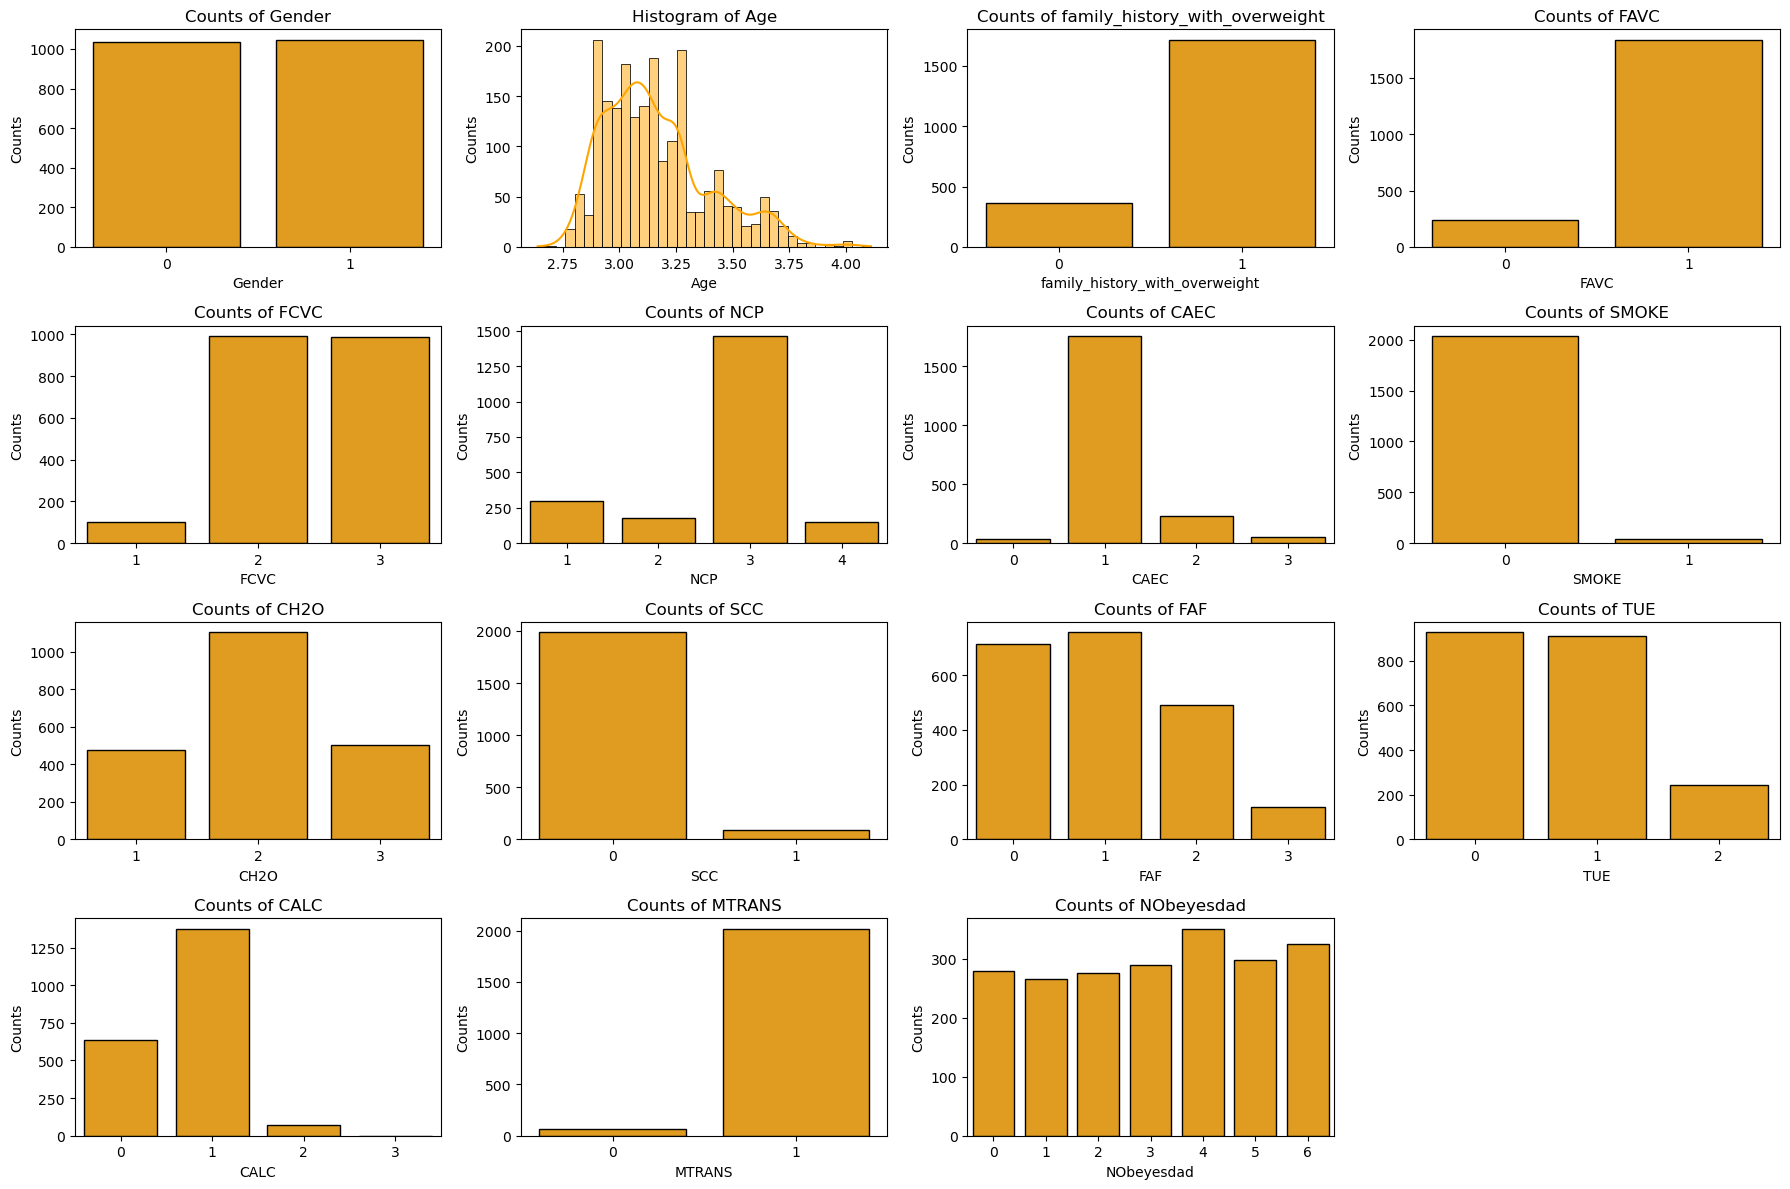

In [162]:
columns = df_transformed.columns
continuous_features = df_transformed.select_dtypes(include = 'float').columns

nrows = np.ceil(len(columns)/4).astype('int')

plt.figure(figsize=(18,12))

for i, c in enumerate(columns):

    plt.subplot(nrows, 4, i+1)
    
    if c in continuous_features:
        sns.histplot(data = df_transformed, x = c, kde = True, color = 'orange', edgecolor = 'black')
        plt.title(f"Histogram of {c}")
        plt.xlabel(c)
        plt.ylabel('Counts')
        
    else:
        sns.countplot(data = df_transformed, x = c, color = 'orange', edgecolor = 'black')
        plt.title(f"Counts of {c}")
        plt.xlabel(c)
        plt.ylabel('Counts')

plt.tight_layout()
plt.show()

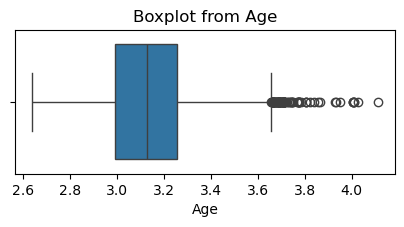

In [163]:
plt.figure(figsize=(16,8))

for i, cf in enumerate (continuous_features):
    plt.subplot(nrows, 4, i+1)
    sns.boxplot(data = df_transformed, x = cf)
    plt.title(f'Boxplot from {cf}')
    plt.xlabel(cf)

plt.tight_layout()
plt.show()

In [164]:
for cf in continuous_features:
   
    Q1 = np.quantile(df_transformed[cf], 0.25)
    Q3 = np.quantile(df_transformed[cf], 0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = df_transformed[(df_transformed[cf] < lower) | (df_transformed[cf] > upper)][cf]
    outlier_indices = outliers.index
    original_outliers = df.loc[outlier_indices][cf]
    percentage = len(outliers)/len(df_transformed[cf])
    
    if percentage > 0:
        print(f"Column {cf}:")
        print(f"Count of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {percentage:.2f}%")
        print(f"Outliers original dataset: {np.sort(np.array(original_outliers))}")
        print(f"Outlier indices: {np.array(outlier_indices).tolist()}")
        print()

Column Age:
Count of outliers: 89
Percentage of outliers: 0.04%
Outliers original dataset: [38.748307 38.825189 38.895069 38.939448 38.943282 38.952866 39.
 39.       39.       39.08886  39.12631  39.129291 39.135634 39.170029
 39.213399 39.214514 39.29266  39.392569 39.569004 39.585811 39.648946
 39.656559 39.685846 39.759575 39.825592 39.965474 40.       40.
 40.       40.       40.       40.       40.106145 40.174191 40.317787
 40.366238 40.466313 40.50021  40.501722 40.564513 40.654155 40.702771
 40.789529 40.794057 40.821515 40.951591 40.973007 40.993179 41.
 41.       41.       41.       41.       41.       41.       41.318302
 41.403862 41.743333 41.823567 42.189023 42.24475  42.31607  42.337283
 42.586285 43.238402 43.37634  43.510672 43.591999 43.604901 43.719395
 43.726081 44.       45.       45.       45.       45.821267 46.491859
 47.283374 47.7061   50.832559 51.       52.       55.       55.
 55.022494 55.137881 55.24625  56.       61.      ]
Outlier indices: [13, 21, 33,

The outliers appear to be correct values.

**Feature Selection**

- Low variance features:

In [166]:
means = df_transformed.select_dtypes(include = 'float').mean()
stds = df_transformed.select_dtypes(include = 'float').std()

cv = stds / means
print(cv.sort_values())

low_cv_features = cv[cv < 0.01].index
print("Features with very low relative variance:", low_cv_features.tolist())

Age    0.074092
dtype: float64
Features with very low relative variance: []


- Highly correlated features (multicollinearity)

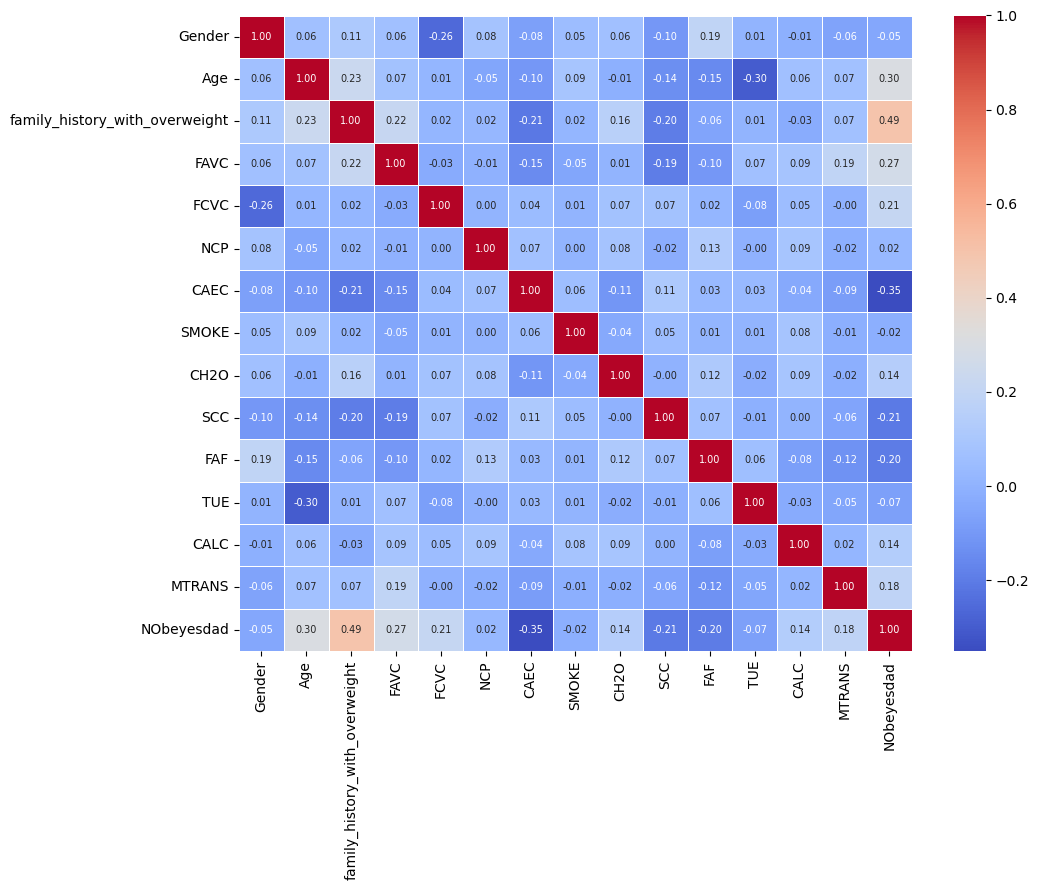

In [168]:
plt.figure(figsize=(11,9))

corr_matrix = df_transformed.corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5, annot_kws={"size": 7})

plt.tight_layout()
plt.show()

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = df_transformed.select_dtypes(include = 'float')
features = add_constant(features)
vif = pd.DataFrame()
vif["feature"] = features.columns
vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
print(vif.sort_values("VIF", ascending=False))

  feature         VIF
0   const  183.247458
1     Age    1.000000


**Class Imbalance (target variable)**

In [171]:
df_transformed['NObeyesdad'].value_counts(normalize = True)

NObeyesdad
4    0.168588
6    0.155620
5    0.142651
3    0.139289
0    0.134006
2    0.132565
1    0.127281
Name: proportion, dtype: float64

There is no class imbalance.

## 5. Choose, train and evaluate the Model

**Model: Random Forest**

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Define X and y
X = df_transformed.drop('NObeyesdad', axis = 1)
y = df_transformed['NObeyesdad']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create the model (we add "random" hyperparameters)
rf_model = RandomForestClassifier(n_estimators=100, # Number of trees. More trees --> better performance, slower training.
                                 max_depth = 5, # Maximum depth of each tree. Controls tree complexity. Crucial to avoid overfitting.
                                 min_samples_split = 3, # Minimum samples needed to split an internal node. Help generalisation by enforcing minimum data at nodes.
                                 min_samples_leaf = 1, # Minimum samples required to be at a leaf node. Help generalisation by enforcing minimum data at nodes.
                                 max_features = 0.7, # Number of features to consider when looking for the best split. Adds randomness, reduces correlation between trees.
                                 random_state = 42
                                )
rf_model.fit(X_train, y_train)

# Make the predictions
y_rf_train_pred = rf_model.predict(X_train)
y_rf_test_pred = rf_model.predict(X_test)

# Calculate Accuracy, Precision and Recall for the training dataset
rf_accuracy_train = accuracy_score(y_train, y_rf_train_pred)
rf_precision_train = precision_score(y_train, y_rf_train_pred, average='macro')
rf_recall_train = recall_score(y_train, y_rf_train_pred, average='macro')
rf_f1_train = f1_score(y_train, y_rf_train_pred, average='macro')

# Calculate Accuracy, Precision and Recall for the test dataset
rf_accuracy_test = accuracy_score(y_test, y_rf_test_pred)
rf_precision_test = precision_score(y_test, y_rf_test_pred, average='macro')
rf_recall_test = recall_score(y_test, y_rf_test_pred, average='macro')
rf_f1_test = f1_score(y_test, y_rf_test_pred, average='macro')

rf_metrics = {
    'Metric': ['Accuracy','Precison','Recall', 'F1-score'],
    'Train': [rf_accuracy_train, rf_precision_train, rf_recall_train, rf_f1_train],
    'Test': [rf_accuracy_test, rf_precision_test, rf_recall_test, rf_f1_test]
}

rf_results_df = pd.DataFrame(rf_metrics)
rf_results_df

,Metric,Train,Test
0,Accuracy,0.682883,0.661871
1,Precison,0.703080,0.663606
2,Recall,0.675328,0.657573
3,F1-score,0.652903,0.631387


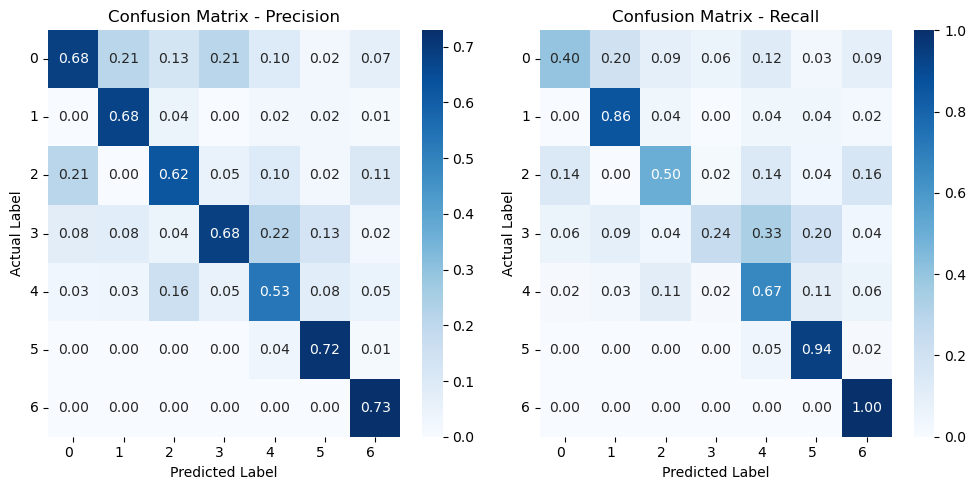

In [175]:
conf_matrix_precision = confusion_matrix(y_test, y_rf_test_pred, normalize = "pred")
conf_matrix_recall = confusion_matrix(y_test, y_rf_test_pred, normalize = "true")

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
heatmap = sns.heatmap(conf_matrix_precision, annot=True, cmap="Blues", fmt=".2f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha="right")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix - Precision")

plt.subplot(1, 2, 2)
heatmap = sns.heatmap(conf_matrix_recall, annot=True, cmap="Blues", fmt=".2f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha="right")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix - Recall")

plt.tight_layout()
plt.show()

Since this model is designed to help determine whether people are suffering from obesity and with that determine a medical procedure, it is very important that the model is able to correctly evaluate the positive cases, especially for most obesity levels (from 4 to 6). We should also pay attention to level 1, as insufficient weight can also be dangerous for the patient.

For the most severe cases (5 - Obesity_Type_II and 6 - Obesity_Type_III) the results are really good. All cases are predicted for level 6 (recall = 100%) and for level 5 (recall = 94%). The remaining 6% are predicted in the neighbouring levels, so the patient would still be classified and treated as obese.

For the first level of obesity, there is room for improvement (recall = 67%). But 17% of cases are misclassified in the most severe levels of obesity. It is therefore possible that the patient receives a more severe diagnosis than is actually necessary, but at least it would not be considered as a healty patient.

The results for level 1 (insufficient weight) are also very good (recall = 86%).

The worst recall performance is for the values corresponding to normal weight and overweight. These are therefore values which, if incorrectly categorised, would not put the patient's health at risk.

In general, we can therefore say that this model would help us to recognise the most dangerous cases and those that require special attention.

Nevertheless, let's see if changing some hyperparameters of our RandomForest model helps to improve the results. To do that we will use two different hyperparameter tuning methods: GridSearchCV und RandomizedSearchCV

In [177]:
# RandomizedSearchCV randomly samples combinations from param_distributions. You control how many combinations to try via n_iter. It is better when you want to explore a wider space efficiently and find good results faster.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [5, 10, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': uniform(0.5, 0.5),
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,  # number of combinations to try
    scoring='recall_macro',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print(random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'class_weight': None, 'max_depth': None, 'max_features': 0.5066324805799333, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 113}


In [178]:
# Create the model
rf_model = RandomForestClassifier(n_estimators = 113, # Number of trees. More trees --> better performance, slower training.
                                 max_depth = None, # Maximum depth of each tree. Controls tree complexity. Crucial to avoid overfitting.
                                 min_samples_split = 5, # Minimum samples needed to split an internal node. Help generalisation by enforcing minimum data at nodes.
                                 min_samples_leaf = 1, # Minimum samples required to be at a leaf node. Help generalisation by enforcing minimum data at nodes.
                                 max_features = 0.5066324805799333, # Number of features to consider when looking for the best split. Adds randomness, reduces correlation between trees.
                                 class_weight= None,
                                 random_state = 42
                                )
rf_model.fit(X_train, y_train)

# Make the predictions
y_rf_train_pred = rf_model.predict(X_train)
y_rf_test_pred = rf_model.predict(X_test)

# Calculate Accuracy, Precision and Recall for the training dataset
rf_accuracy_train = accuracy_score(y_train, y_rf_train_pred)
rf_precision_train = precision_score(y_train, y_rf_train_pred, average='macro')
rf_recall_train = recall_score(y_train, y_rf_train_pred, average='macro')
rf_f1_train = f1_score(y_train, y_rf_train_pred, average='macro')

# Calculate Accuracy, Precision and Recall for the test dataset
rf_accuracy_test = accuracy_score(y_test, y_rf_test_pred)
rf_precision_test = precision_score(y_test, y_rf_test_pred, average='macro')
rf_recall_test = recall_score(y_test, y_rf_test_pred, average='macro')
rf_f1_test = f1_score(y_test, y_rf_test_pred, average='macro')

rf_metrics = {
    'Metric': ['Accuracy','Precison','Recall', 'F1-score'],
    'Train': [rf_accuracy_train, rf_precision_train, rf_recall_train, rf_f1_train],
    'Test': [rf_accuracy_test, rf_precision_test, rf_recall_test, rf_f1_test]
}

rf_results_df = pd.DataFrame(rf_metrics)
rf_results_df

,Metric,Train,Test
0,Accuracy,0.970571,0.803357
1,Precison,0.970231,0.800995
2,Recall,0.969638,0.804015
3,F1-score,0.969784,0.801411


In [179]:
# GridSearchCV does an exhaustive search over all possible combinations in param_grid. Can be very computationally expensive.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [0.7, 'sqrt'],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'class_weight': 'balanced', 'max_depth': None, 'max_features': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}


In [225]:
# Create the model
rf_model = RandomForestClassifier(n_estimators=200, # Number of trees. More trees --> better performance, slower training.
                                 max_depth = None, # Maximum depth of each tree. Controls tree complexity. Crucial to avoid overfitting.
                                 min_samples_split = 3, # Minimum samples needed to split an internal node. Help generalisation by enforcing minimum data at nodes.
                                 min_samples_leaf = 1, # Minimum samples required to be at a leaf node. Help generalisation by enforcing minimum data at nodes.
                                 max_features = 0.7, # Number of features to consider when looking for the best split. Adds randomness, reduces correlation between trees.
                                 random_state = 42
                                )
rf_model.fit(X_train, y_train)

# Make the predictions
y_rf_train_pred = rf_model.predict(X_train)
y_rf_test_pred = rf_model.predict(X_test)

# Calculate Accuracy, Precision and Recall for the training dataset
rf_accuracy_train = accuracy_score(y_train, y_rf_train_pred)
rf_precision_train = precision_score(y_train, y_rf_train_pred, average='macro')
rf_recall_train = recall_score(y_train, y_rf_train_pred, average='macro')
rf_f1_train = f1_score(y_train, y_rf_train_pred, average='macro')

# Calculate Accuracy, Precision and Recall for the test dataset
rf_accuracy_test = accuracy_score(y_test, y_rf_test_pred)
rf_precision_test = precision_score(y_test, y_rf_test_pred, average='macro')
rf_recall_test = recall_score(y_test, y_rf_test_pred, average='macro')
rf_f1_test = f1_score(y_test, y_rf_test_pred, average='macro')

rf_metrics = {
    'Metric': ['Accuracy','Precison','Recall', 'F1-score'],
    'Train': [rf_accuracy_train, rf_precision_train, rf_recall_train, rf_f1_train],
    'Test': [rf_accuracy_test, rf_precision_test, rf_recall_test, rf_f1_test]
}

rf_results_df = pd.DataFrame(rf_metrics)
rf_results_df

,Metric,Train,Test
0,Accuracy,0.994595,0.788969
1,Precison,0.994458,0.787820
2,Recall,0.994239,0.788556
3,F1-score,0.994315,0.785571


With these two methods we suffer from overfitting. We could try to introduce the hyperparameters manually and see if we improve the performance of our first model.